In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    })

--------------------------------

# Results


### PINN: 

Network: [1, 50, 50, 50, 50, 51]

Num Param: 10.35k

Error lambda_1 (Clean Data): 0.016499%

Error lambda_2 (Clean Data): 0.011111%

Error lambda_1 (Noisy Data): 0.153911%

Error lambda_2 (Noisy Data): 0.045160% 


### QRes-PINN: 
Network: [1, 20, 20, 20, 20, 51]

Num Param: 4.61k

Error lambda_1 (Clean Data): 0.008750%

Error lambda_2 (Clean Data): 0.009676%

Error lambda_1 (Noisy Data): 0.183016%

Error lambda_2 (Noisy Data): 0.008587%


## Count Number of Parameters

In [2]:
l = [1, 50, 50, 50, 50, 51]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] + l[i+1]
print("PINN Num params: %.2fk" % np.round(num_param / 1000, 2))

PINN Num params: 10.35k


In [3]:
l = [1, 20, 20, 20, 20, 51]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] * 2 + l[i+1]
print("QRes Num params: %.2fk" % np.round(num_param / 1000, 2))

QRes Num params: 4.61k



--------------------------------

# Training Loss


In [4]:
pinn_clean = np.load("loss/loss_clean_PINNs.npy")
qres_clean = np.load("loss/loss_clean_QRes.npy")
pinn_noisy = np.load("loss/loss_noisy_PINNs.npy")
qres_noisy = np.load("loss/loss_noisy_QRes.npy")

In [5]:
# remove the spike at L-BFGS initial epoch 
def purge(array):
    array = list(array)
    array.remove(max(array))
    array = np.array(array)
    return array

pinn_clean = purge(pinn_clean)
qres_clean = purge(qres_clean)
pinn_noisy = purge(pinn_noisy)
qres_noisy = purge(qres_noisy)

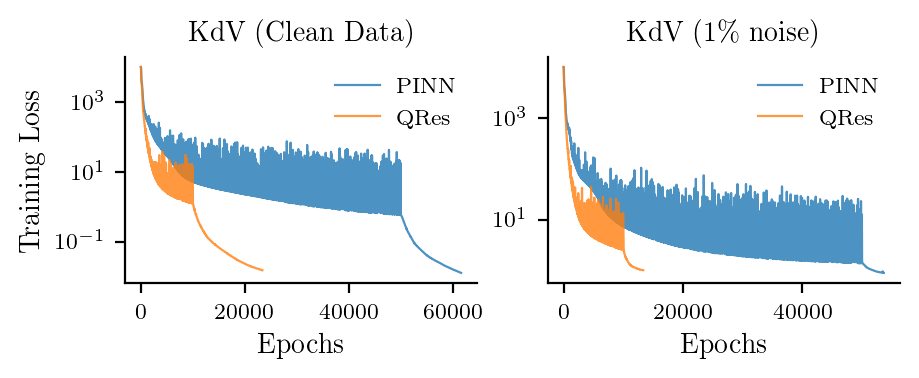

In [20]:
fig, axes = plt.subplots(1, 2, dpi=200, figsize=(5, 1.5))

x_pinn = np.concatenate((
    np.arange(0, 50000, 10), 
    np.arange(len(pinn_clean) - 5000) + 50000
))
x_qres = np.concatenate((
    np.arange(0, 10000, 10), 
    np.arange(len(qres_clean) - 1000) + 10000
))


ax = axes[0]
sns.lineplot(x=x_pinn, y=pinn_clean, label='PINN', lw=0.8, alpha=0.8, ax=ax)
sns.lineplot(x=x_qres, y=qres_clean, label='QRes', lw=0.8, alpha=0.8, ax=ax)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Training Loss', fontsize=10)
ax.set_title('KdV (Clean Data)', fontsize=10)
ax.set_yscale('log')
ax.legend(frameon=False)

x_pinn = np.concatenate((
    np.arange(0, 50000, 10), 
    np.arange(len(pinn_noisy) - 5000) + 50000
))
x_qres = np.concatenate((
    np.arange(0, 10000, 10), 
    np.arange(len(qres_noisy) - 1000) + 10000
))

ax = axes[1]
sns.lineplot(x=x_pinn, y=pinn_noisy, label='PINN', lw=0.8, alpha=0.8, ax=ax)
sns.lineplot(x=x_qres, y=qres_noisy, label='QRes', lw=0.8, alpha=0.8, ax=ax)
ax.set_xlabel('Epochs')
ax.set_title('KdV (1\% noise)', fontsize=10)
ax.set_yscale('log')
ax.legend(frameon=False)

sns.despine()
fig.show()